In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs
from polar_stereo_function import circular_polar_plot

In [2]:
file   = 'WACCMX+DART_UVTGPH_2009011900-2009030523.nc'
ds=xr.open_dataset(file)
ds=ds.rename({"nc": "lon","nr":"lat"})
# lon    = ds.variables['LONGITUDE'][...]

In [5]:
ds 

<xarray.Dataset>
Dimensions:     (lat: 96, lon: 144, np: 76, nstep: 120)
Dimensions without coordinates: lat, lon, np, nstep
Data variables:
    YYYYMMDDHH  (nstep) int32 ...
    LONGITUDE   (lon) float32 ...
    LATITUDE    (lat) float32 ...
    PRESSURE    (np) float32 ...
    U           (nstep, np, lat, lon) float32 ...
    V           (nstep, np, lat, lon) float32 ...
    T           (nstep, np, lat, lon) float32 ...
    GPH         (nstep, np, lat, lon) float32 ...
Attributes:
    Description:  Hourly WACCMX-DART U V T GPH for 5 days from 2009011900-200...
    Author:       V. Lynn Harvey, file was created using save_waccm_dart4alon...
    nc:           Number of Longitudes
    nr:           Number of Latitudes
    np:           Number of Pressure Levels
    nstep:        Number of Output Times

In [3]:
# plt.contourf(ds.GPH[0,0,:,:],cmap='jet')
# plt.xlabel('LONGITUDE INDEX')
# plt.ylabel('LATITUDE INDEX')
# plt.title('surface pressure')

# plt.show()

data_U = xr.DataArray(ds.U[95,34,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
data_V = xr.DataArray(ds.V[0,75,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
wind_speed = np.sqrt(np.power(data_U,2)+np.power(data_V,2))
data_windSpeed = xr.DataArray(wind_speed, coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])

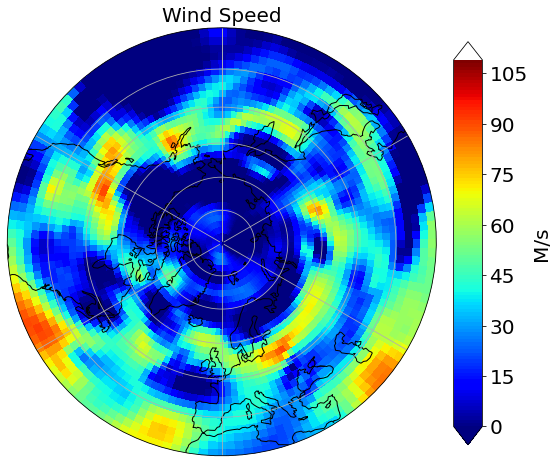

In [9]:
circular_polar_plot(data_U, 30, 'jet', 'Wind Speed',
                    cbar_label='M/s', levels_=np.arange(0,110,1), cbar_levels_=np.arange(0,110,15))
plt.show()

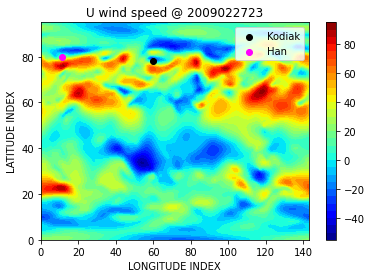

In [7]:
plt.contourf(data_U,30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('U wind speed @ 2009022723')
plt.colorbar()
plt.scatter(60,78,color='black',label='Kodiak')
plt.scatter(11,80,color='magenta',label='Han')
plt.legend()



plt.show()

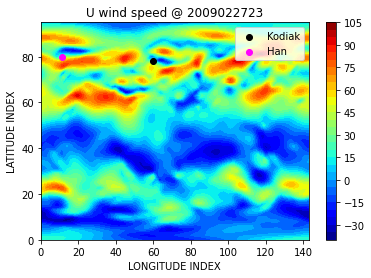

In [10]:
data_U1 = xr.DataArray(ds.U[95,37,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])

plt.contourf(data_U1,30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('U wind speed @ 2009022723')
plt.colorbar()
plt.scatter(60,78,color='black',label='Kodiak')
plt.scatter(11,80,color='magenta',label='Han')
plt.legend()



plt.show()

In [ ]:
circular_polar_plot(data_U, 30, 'jet', 'Wind Speed',
                    cbar_label='M/s', levels_=np.arange(0,60,1), cbar_levels_=np.arange(0,60,10))
circular_polar_plot(data_U, 30, 'jet', 'Wind Speed',
                    cbar_label='M/s', levels_=np.arange(0,60,1), cbar_levels_=np.arange(0,60,10))

plt.show()

In [33]:
ds.LATITUDE[80]

<xarray.DataArray 'LATITUDE' ()>
array(61.57895, dtype=float32)